# Step 1: Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Step 1.1: Loading the dataset

In [4]:
df = pd.read_csv("J:\Data Science\My Overall Notes\Data\linear_svm_coffee_data.csv")
df

,Friendliness_Level,Compliments_Given,Free_Coffee
0,4.370861,5.888978,0
1,9.556429,7.701955,1
2,7.587945,17.022733,1
3,6.387926,6.338440,1
4,2.404168,3.389855,0
...,...,...,...
245,9.354867,7.067045,1
246,4.853657,11.673122,1
247,9.699893,1.554693,1
248,9.672580,19.487896,1


## Scenario:
#### This dataset predicts whether a customer gets a free coffee based on their friendliness level and number of compliments given. 
#### The relationship between these features and the target is linear, making it suitable for a linear SVM model.

## Features

### `Friendliness_Level`: Range: [1, 10]
#### A measure of the customer's friendliness on a scale from 1 to 10.

### `Compliments_Given`: Range: [0, 20]
#### The number of compliments the customer gives to staff.

## Target

### `Free_Coffee`: Binary classification (0, 1)
#### Description: Whether the customer gets a free coffee.
#### 0: No free coffee.
#### 1: Free coffee.

## Step 2: We will extract the dependent and independent variables from the given dataset.

In [6]:
X = df[['Friendliness_Level', 'Compliments_Given']]
y = df['Free_Coffee']

## Step 2.1: Spliting the dataset into training and Testing data

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3 Step 2.2: Fitting the Model to the Training set

In [10]:
# Train a linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

## Step 2.3: Predicting Twoards the Test Result

In [12]:
# Predict on test data
y_pred = linear_svm.predict(X_test)

# Evaluate the model
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred))

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.98      0.99        53

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.98        75
weighted avg       0.99      0.99      0.99        75



## Step 3: Visualizing the Results

C:\Users\jeyaj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


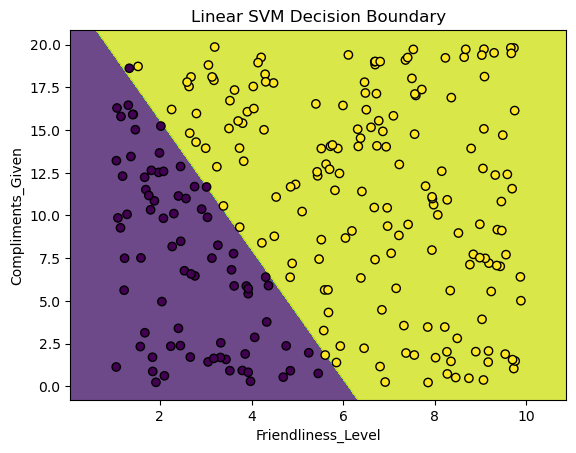

In [14]:
# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
    y = y.ravel()  # Flatten y if needed
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Friendliness_Level')
    plt.ylabel('Compliments_Given')
    plt.title("Linear SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, linear_svm)